# Алгоритмы классификации

## MNIST Digits

Воспользуйтесь данными с https://www.kaggle.com/c/digit-recognizer/data 
Далее предполагается, что файлы test.csv и train.csv расположены в одной директории с notebook-ом.

В задании для оценивания качества работы алгоритмов требуется (самостоятельно) реализовать 10-тикратную перекрестную проверку (https://en.wikipedia.org/wiki/Cross-validation_(statistics)). В качестве ошибки используется средняя доля ошибок. Один раз (для kNN) в методических целях требуется дополнительно найти среднюю ошибку на обучающей части выборок перекрестной проверки. 

Разбиение на подвыборки должно быть одинаково для всех алгоритмов.

In [112]:
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import pandas as pd
import numpy as np

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

In [17]:
# Загрузите обучающую выборку (признаки и метки классов)
data = pd.read_csv('train.csv').as_matrix()
images_all = data[:, 1:]
labels_all = data[:, :1]

<h1>KNN</h1>

In [18]:
# примените метод kNN
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# нарисовать графики зависимости ошибки перекрестной проверки на обучающей части и на тестовой части от k. 
# Сделать вывод об оптимальном k.
# (*) какие еще параметры влияют на результат классификации и как?

In [29]:
d = data[np.random.choice(data.shape[0], 100)]
images = d[:, 1:]
labels = d[:, :1]

In [57]:
n = 5
k_fold = KFold(n_splits=n)
cv_data = k_fold.split(d)

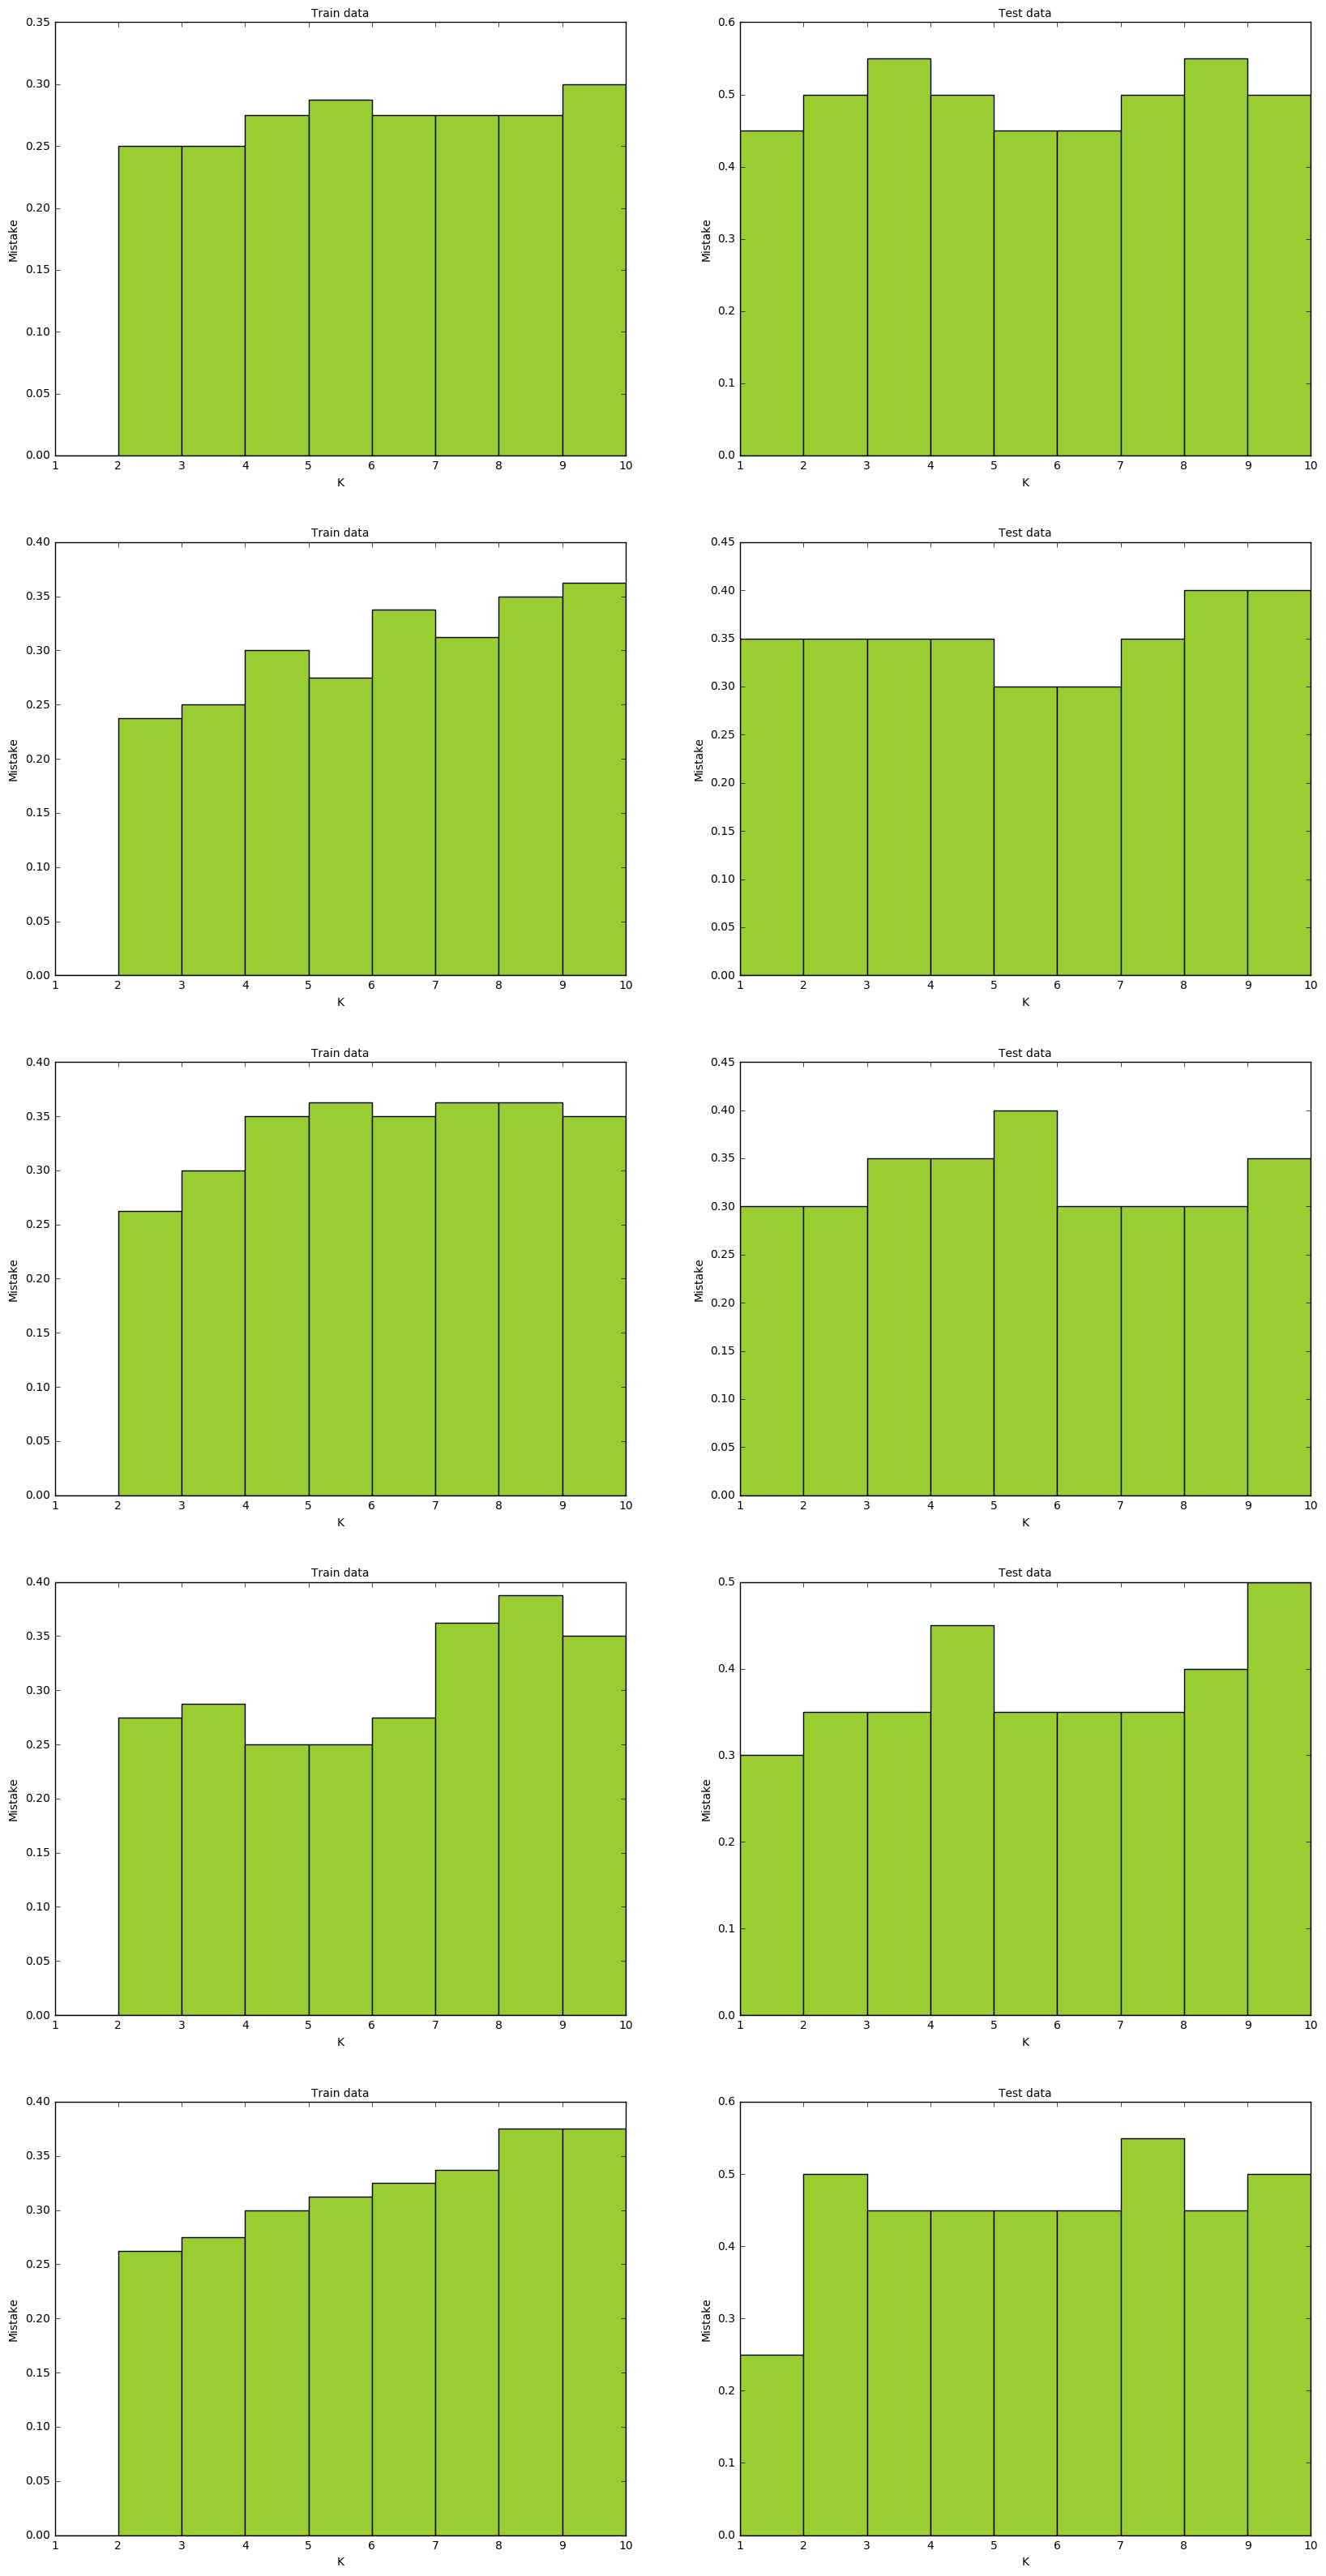

In [55]:
plt.figure(figsize=(20, 40))
train_predict = [[] for i in range(n)]
test_predict = [[] for i in range(n)]

im_cnt = 1
sector_cnt = 1
for train_index, test_index in cv_data:
    X_train, Y_train = images[train_index], labels[train_index]
    X_test, Y_test = images[test_index], labels[test_index]
    for i in range(1, 10):
        clf = KNeighborsClassifier(n_neighbors=i)
        clf.fit(X_train, Y_train.ravel())
        train_predict[sector_cnt - 1].append(1 - clf.score(X_train, Y_train))
        test_predict[sector_cnt - 1].append(1 - clf.score(X_test, Y_test))
    
    plt.subplot(n, 2, im_cnt)
    x = np.arange(1, 10)
    plt.bar(x, height=train_predict[sector_cnt - 1], width=1, color='yellowgreen')
    title_text = 'Train data'
    plt.title(title_text, size=10)
    plt.xlabel('K')
    plt.ylabel('Mistake')
    im_cnt += 1
    
    plt.subplot(n, 2, im_cnt)
    x = np.arange(1, 10)
    plt.bar(x, height=test_predict[sector_cnt - 1], width=1, color='yellowgreen')
    title_text = 'Test data'
    plt.xlabel('K')
    plt.ylabel('Mistake')
    plt.title(title_text, size=10)
    im_cnt += 1
    
    sector_cnt += 1

Отметим, что в среднем минимальная ошибка достигается при k не очень большом, но и не маленьком. По графикам этот результат равен примерно 5. 
Так же стоит отметить, что мы сами можем задавать такие параметры, как веса объектов, которые по умолчанию все равны 1, а также метрику, в которой производится расчет расстояния. Оба этих фактора будут сильно влиять на результат.

<h1>SVM</h1>

In [13]:
# примените метод SVM
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# нарисовать график зависимости ошибки перекрестной проверки на тестовой части от регуляризации C (log масштаб перебора по C). 
# Сделать вывод об оптимальном C.
# Что означают и как влияют параметры multi_class, fit_intercept, intercept_scaling, class_weight, random_state?
# Нарисуйте график зависимости числа опорных векторов как функцию от C

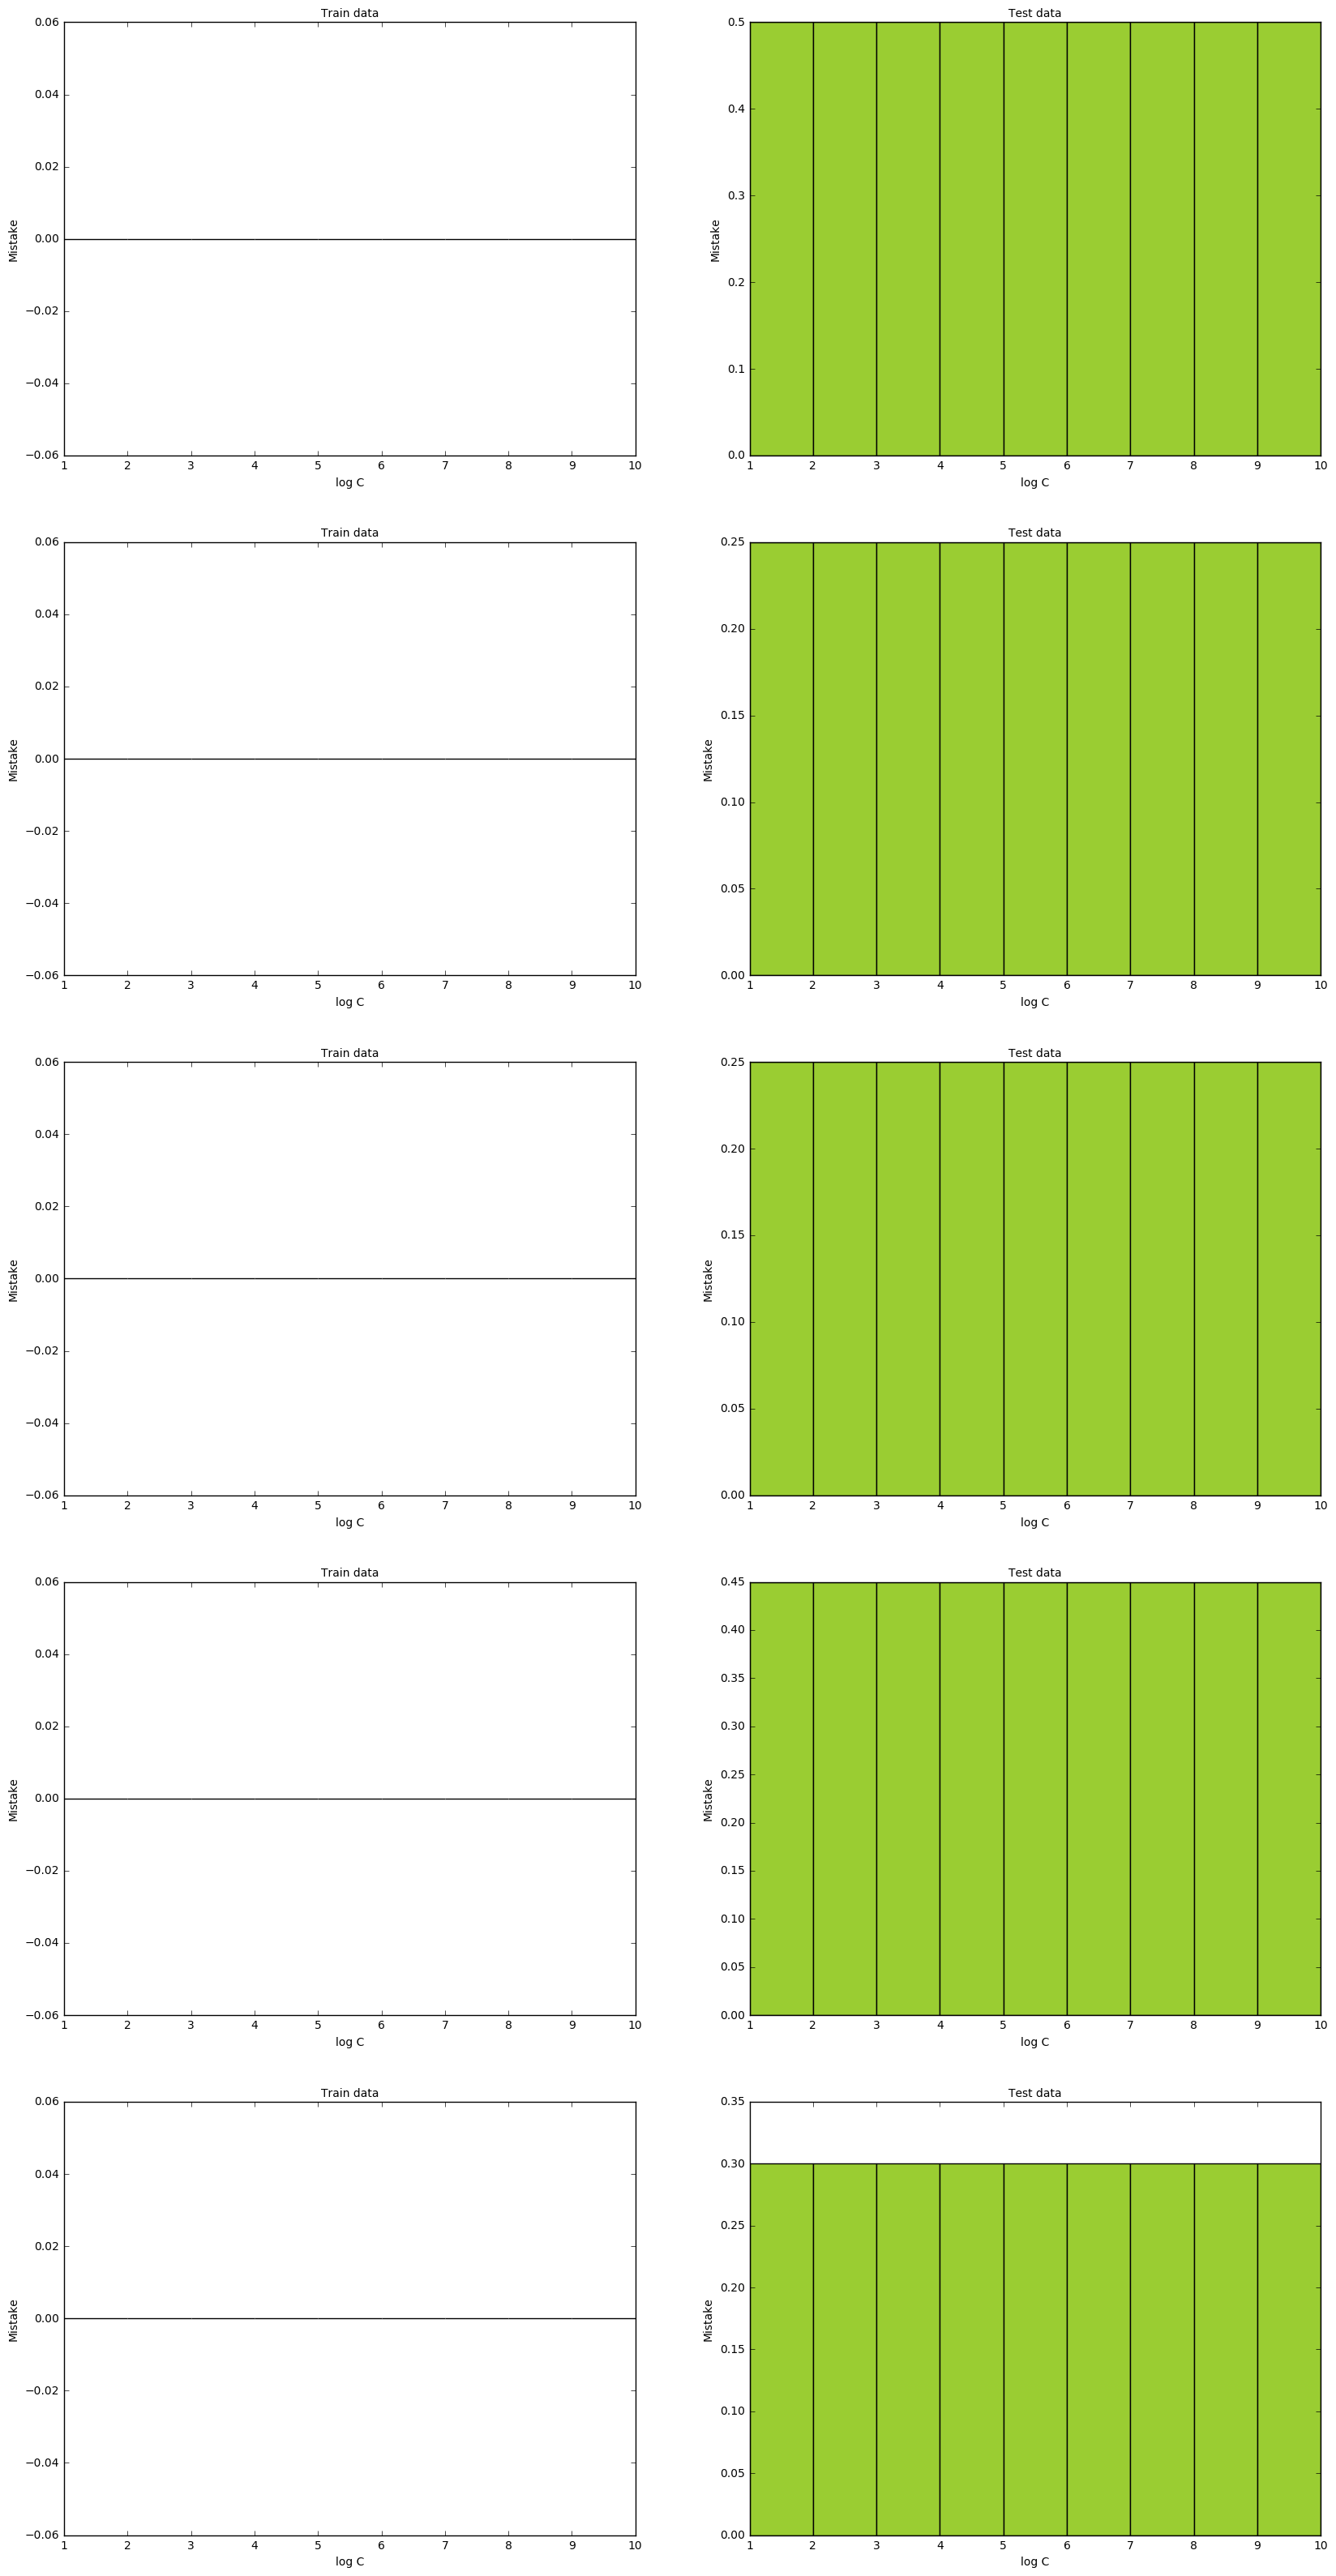

In [58]:
plt.figure(figsize=(20, 40))
train_predict = [[] for i in range(n)]
test_predict = [[] for i in range(n)]

im_cnt = 1
sector_cnt = 1
for train_index, test_index in cv_data:
    X_train, Y_train = images[train_index], labels[train_index]
    X_test, Y_test = images[test_index], labels[test_index]
    for i in range(-4, 5):
        clf = LinearSVC(C=(10**i))
        clf.fit(X_train, Y_train.ravel())
        train_predict[sector_cnt - 1].append(1 - clf.score(X_train, Y_train))
        test_predict[sector_cnt - 1].append(1 - clf.score(X_test, Y_test))
    
    plt.subplot(n, 2, im_cnt)
    x = np.arange(1, 10)
    plt.bar(x, height=train_predict[sector_cnt - 1], width=1, color='yellowgreen')
    title_text = 'Train data'
    plt.title(title_text, size=10)
    plt.xlabel('log C')
    plt.ylabel('Mistake')
    im_cnt += 1
    
    plt.subplot(n, 2, im_cnt)
    x = np.arange(1, 10)
    plt.bar(x, height=test_predict[sector_cnt - 1], width=1, color='yellowgreen')
    title_text = 'Test data'
    plt.xlabel('log C')
    plt.ylabel('Mistake')
    plt.title(title_text, size=10)
    im_cnt += 1
    
    sector_cnt += 1

Как мы видим, трудно сделать выбор об оптимальном C, так как при изменение параметра ошибка не меняется.

In [59]:
X_train, Y_train = images[:90], labels[:90]
X_test, Y_test = images[-10:], labels[-10:]

multi_class - определяет стратегию работы алгоритма. По умолчанию равен "ovr". Существует еще одно значение "crammer_singer", но не используется на практике, так как дает меньшую точность, потребляя больше вычислительных ресурсов 

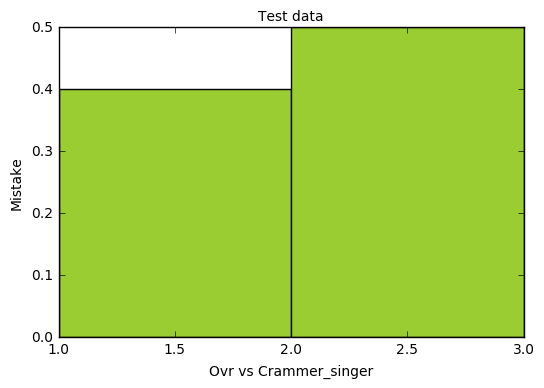

In [66]:
k = 5
result = []

clf = LinearSVC(C=(10**k), multi_class="ovr")
clf.fit(X_train, Y_train.ravel())
result.append(1 - clf.score(X_test, Y_test))
    
clf = LinearSVC(C=(10**k), multi_class="crammer_singer")
clf.fit(X_train, Y_train.ravel())
result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('Ovr vs Crammer_singer')
plt.ylabel('Mistake')

fit_intercept on/off

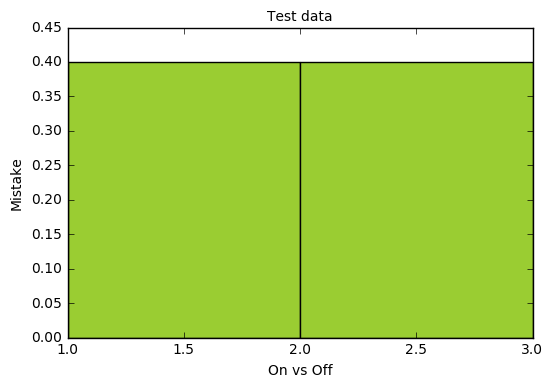

In [88]:
k = 5
result = []

clf = LinearSVC(C=(10**k), fit_intercept=1)
clf.fit(X_train, Y_train.ravel())
result.append(1 - clf.score(X_test, Y_test))
    
clf = LinearSVC(C=(10**k), fit_intercept=0)
clf.fit(X_train, Y_train.ravel())
result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('On vs Off')
plt.ylabel('Mistake')

intercept_scaling

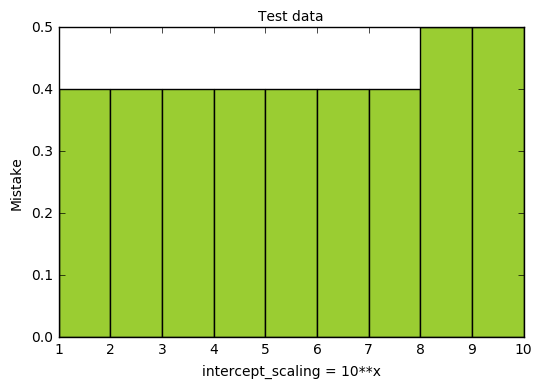

In [90]:
k = 5
result = []

for i in range(-4, 5):
    clf = LinearSVC(C=10**k, intercept_scaling=10**i)
    clf.fit(X_train, Y_train.ravel())
    result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('intercept_scaling = 10**x')
plt.ylabel('Mistake')

class_weight - есть возможность задавать веса разным классам

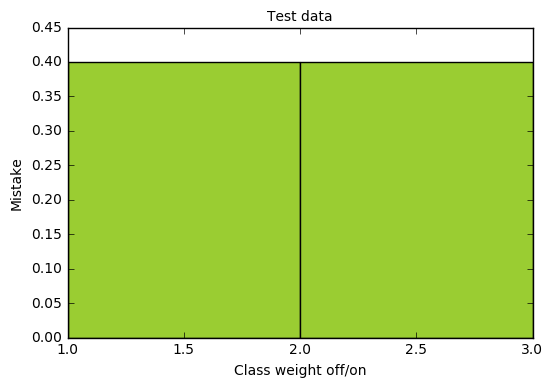

In [92]:
k = 5
result = []

clf = LinearSVC(C=(10**k))
clf.fit(X_train, Y_train.ravel())
result.append(1 - clf.score(X_test, Y_test))
    
clf = LinearSVC(C=(10**k), class_weight={1:10, 2:20, 3:30})
clf.fit(X_train, Y_train.ravel())
result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('Class weight off/on')
plt.ylabel('Mistake')

random state - зафиксированное состояние

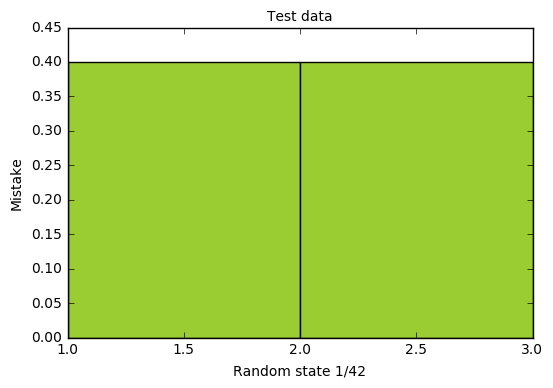

In [94]:
k = 5
result = []

clf = LinearSVC(C=(10**k), random_state=1)
clf.fit(X_train, Y_train.ravel())
result.append(1 - clf.score(X_test, Y_test))
    
clf = LinearSVC(C=(10**k), random_state=42)
clf.fit(X_train, Y_train.ravel())
result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('Random state 1/42')
plt.ylabel('Mistake')

<h1>DT</h1>

In [14]:
# примените метод DT
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Как влияют и что означают параметры max_depth, min_samples_split, min_samples_leaf, criteria на качество классификатора?
# Выбрать наилучшие значения параметров по вашим экспериментам

max_depth - максимальная глубина дерева

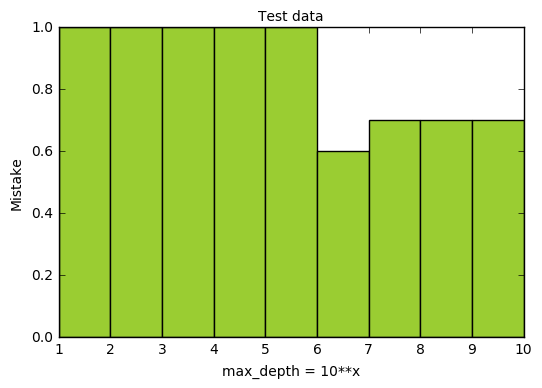

In [100]:
result = []

for i in range(-4, 5):
    clf = DecisionTreeClassifier(random_state=42, max_depth=10**i)
    clf.fit(X_train, Y_train.ravel())
    result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('max_depth = 10**x')
plt.ylabel('Mistake')

min_samples_split

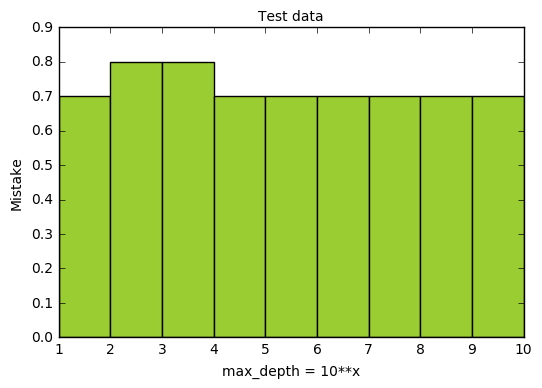

In [105]:
result = []

for i in range(2, 11):
    clf = DecisionTreeClassifier(random_state=42, min_samples_split=i)
    clf.fit(X_train, Y_train.ravel())
    result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('min_samples_split = x')
plt.ylabel('Mistake')

min_samples_leaf

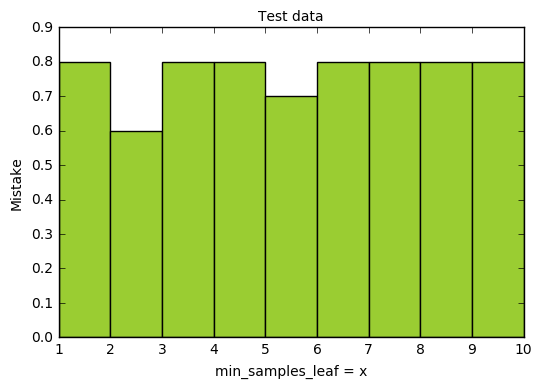

In [107]:
result = []

for i in range(2, 11):
    clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=i)
    clf.fit(X_train, Y_train.ravel())
    result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('min_samples_leaf = x')
plt.ylabel('Mistake')

criteria

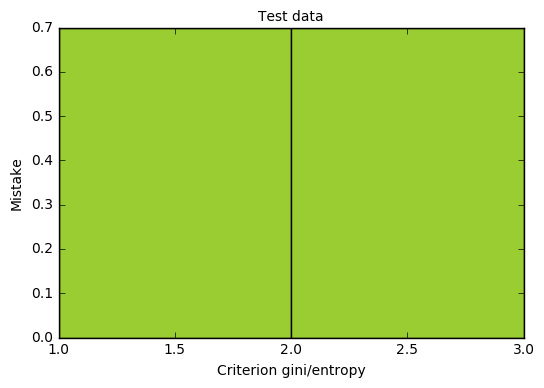

In [111]:
result = []

clf = DecisionTreeClassifier(random_state=42, criterion='gini')
clf.fit(X_train, Y_train.ravel())
result.append(1 - clf.score(X_test, Y_test))
    
clf = DecisionTreeClassifier(random_state=42, criterion='entropy')
clf.fit(X_train, Y_train.ravel())
result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('Criterion gini/entropy')
plt.ylabel('Mistake')

Отметим, что лучше всего нам подошли параметры max_depth=7, min_samples_split=5, min_samples_leaf=3, criteria='gini'

<h1>NN</h1>

In [ ]:
# примените метод NN
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# Как влияет параметр hidden_layer_sizes на качество классификации?
# Выбрать наилучшее значение параметра по вашим экспериментам
# (***) воспользуйтесь NN из theano (http://deeplearning.net/software/theano/tutorial/ и http://deeplearning.net/tutorial/

hidden_layer_sizes

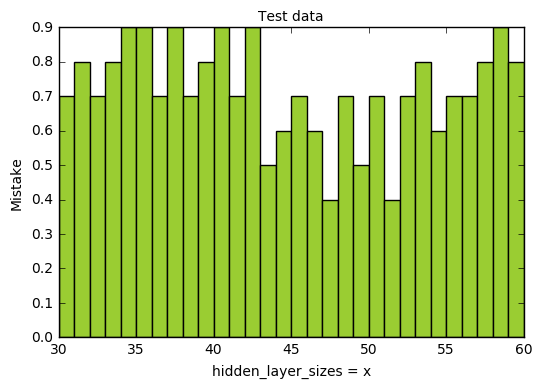

In [123]:
result = []

for i in range(30, 60):
    clf = MLPClassifier(hidden_layer_sizes=i)
    clf.fit(X_train, Y_train.ravel())
    result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(30, len(result) + 30), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('hidden_layer_sizes = x')
plt.ylabel('Mistake')

Из графика видим небольшую яму для x [42 - 55], в которой минимум достигается при hidden_layer_sizes = 48

<h1>Итог</h1>

In [ ]:
# Сделайте вывод о наилучшем методе и его оптимальных параметрах

Из всех методов самую маленькую ошибку показал KNN Classifier, поэтому логично выбрать его как лучший метод

In [ ]:
# (*) Обучите наилучший метод с оптимальными параметрами на полной выборке, 
# примените к тестовой выборке соревнования и загрузите результат на kaggle